# With simulation cycles

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def visualize_access_reuse(input_csv: str):
    # Read the CSV file
    # Set your CSV filename here
    df = pd.read_csv(input_csv)

    # Extract the data (assuming the CSV has columns with these names)
    # Create x-axis labels using tile_m and tile_n columns
    labels = [f"{m}_{n}" for m, n in zip(df['tile_N'], df['tile_F'])]
    on_chip_values = df['on_chip_requirement_bytes']
    cycles_values = df['cycles']
    off_chip_values = df['off_chip_traffic_bytes']

    # Set up the chart with multiple y-axes
    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Width of bars

    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Create bars for off-chip metrics on primary y-axis
    bars1 = ax1.bar(x + width/2, off_chip_values, width, label='Off-chip Traffic', alpha=0.8, color='orange')

    # Customize the primary axis (bars)
    ax1.set_xlabel('Tile Configuration ((batch_dim_tile)_(moe_inter_dim_tile))', fontsize=15)
    ax1.set_ylabel('Off-chip Traffic', fontsize=15, color='black')
    # ax1.set_title('Performance Metrics with Triple Y-Axes', fontsize=15, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels)
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.set_ylim(1e3, 1e7)

    # Create secondary y-axis for cycles line chart
    ax2 = ax1.twinx()
    # line2 = ax2.plot(x, cycles_values, color='red', marker='o', linewidth=2, markersize=8, label='Cycles')
    # ax2.set_ylabel('Cycles', fontsize=15, color='red')
    # ax2.tick_params(axis='y', labelcolor='red')
    # Plot line segments connecting only 4 consecutive points each
    segment_size = 4
    for i in range(0, len(x), segment_size):
        end_idx = min(i + segment_size, len(x))
        x_segment = x[i:end_idx]
        cycles_segment = cycles_values.iloc[i:end_idx] if hasattr(cycles_values, 'iloc') else cycles_values[i:end_idx]
        
        if i == 0:  # Add label only to first segment for legend
            ax2.plot(x_segment, cycles_segment, color='red', marker='o', linewidth=2, markersize=8, label='Cycles')
        else:
            ax2.plot(x_segment, cycles_segment, color='red', marker='o', linewidth=2, markersize=8)

    ax2.set_ylabel('Cycles', fontsize=15, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(0, 50000)

    # Create third y-axis for on-chip requirement bars
    ax3 = ax1.twinx()
    # Offset the third y-axis to the right
    ax3.spines['right'].set_position(('outward', 60))
    bars2 = ax3.bar(x - width/2, on_chip_values, width, label='On-chip Requirement', alpha=0.8, color='steelblue')
    ax3.set_ylabel('On-chip Requirement', fontsize=15, color='steelblue')
    ax3.tick_params(axis='y', labelcolor='steelblue')
    # ax3.set_ylim(1e3, 1e7)

    # Add value labels on bars
    def add_value_labels_bars(bars, values, ax_ref):
        for bar, value in zip(bars, values):
            height = bar.get_height()
            ax_ref.annotate(f'{value:,.0f}' if abs(value) >= 1 else f'{value:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=5, fontweight='bold')

    # Add value labels on bars
    add_value_labels_bars(bars1, off_chip_values, ax1)
    add_value_labels_bars(bars2, on_chip_values, ax3)

    # Combine legends from all axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()
    ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3,
            bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=3, fontsize=15)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    # Display the plot
    plt.show()

    # Optional: Save the plot
    # plt.savefig('csv_triple_axis_chart.png', dpi=300, bbox_inches='tight')

    # Print some info about the data
    print(f"Data shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print(f"First few rows:")
    print(df.head())


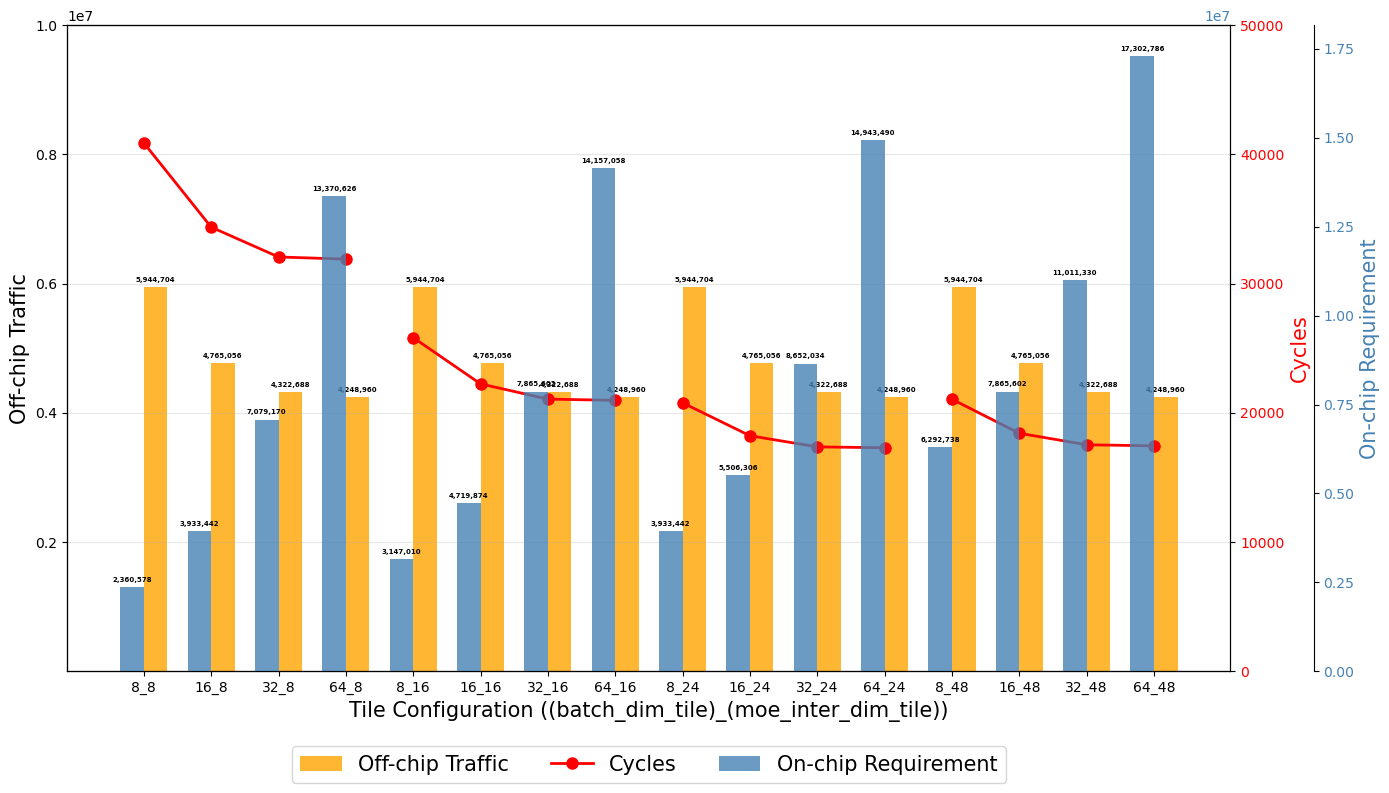

Data shape: (16, 9)
Columns: ['batch', 'tile_N', 'tile_F', 'flops', 'padded_flops', 'cycles', 'duration_s', 'off_chip_traffic_bytes', 'on_chip_requirement_bytes']
First few rows:
   batch  tile_N  tile_F      flops  padded_flops  cycles  duration_s  \
0     44       8       8   55080960      24786432   40887         137   
1     44      16       8   88129536      57835008   34370          99   
2     44      32       8  159734784     129440256   32061          87   
3     44      64       8  313961472     283666944   31895          88   
4     44       8      16   55080960      24786432   25825          76   

   off_chip_traffic_bytes  on_chip_requirement_bytes  
0                 5944704                    2360578  
1                 4765056                    3933442  
2                 4322688                    7079170  
3                 4248960                   13370626  
4                 5944704                    3147010  


In [19]:
visualize_access_reuse("./qwen_128_48_80gb_max4192_iter022_layer_010_mn_mk.csv")

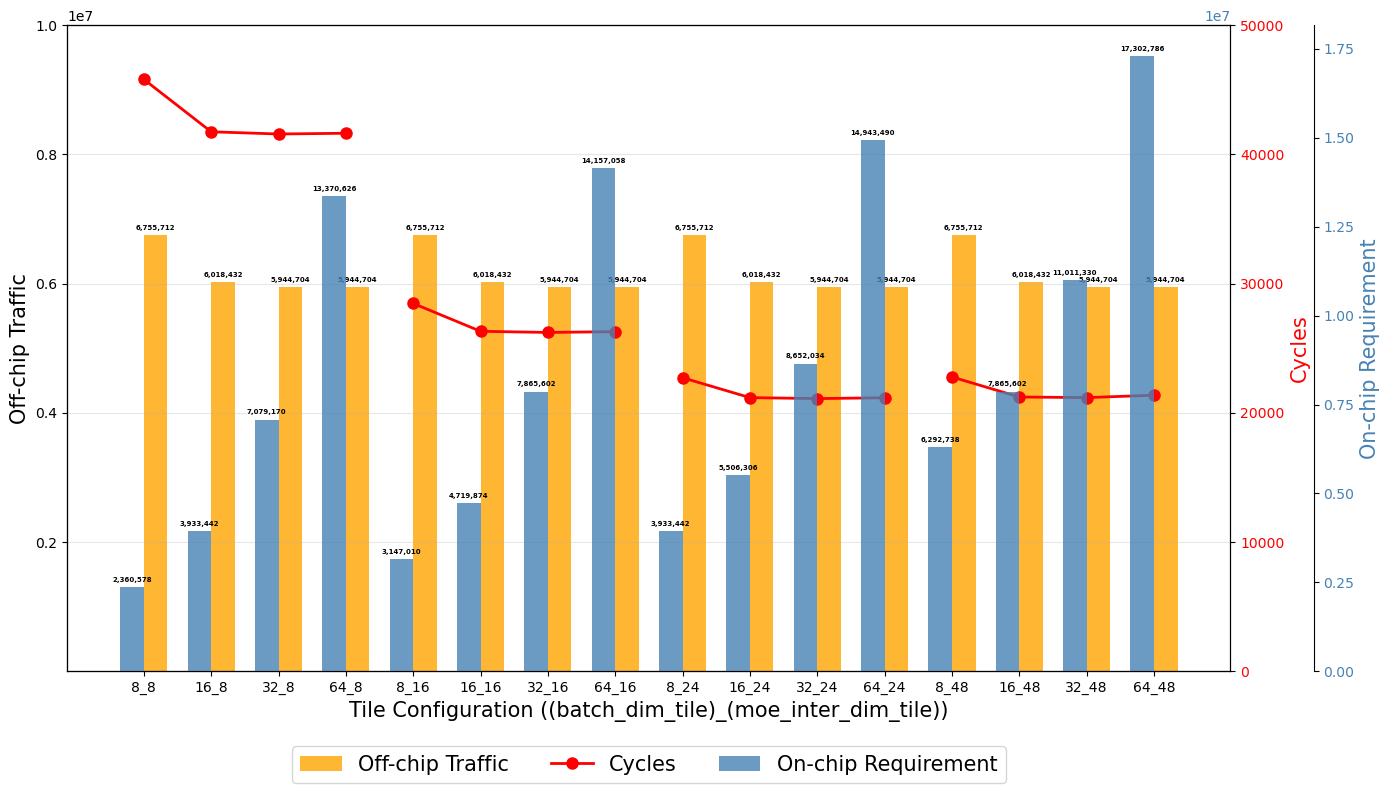

Data shape: (16, 9)
Columns: ['batch', 'tile_N', 'tile_F', 'flops', 'padded_flops', 'cycles', 'duration_s', 'off_chip_traffic_bytes', 'on_chip_requirement_bytes']
First few rows:
   batch  tile_N  tile_F      flops  padded_flops  cycles  duration_s  \
0     44       8       8   62654592      32360064   45805         176   
1     44      16       8  111538944      81244416   41750         155   
2     44      32       8  220323840     190029312   41577         154   
3     44      64       8  440647680     410353152   41635         153   
4     44       8      16   62654592      32360064   28467          95   

   off_chip_traffic_bytes  on_chip_requirement_bytes  
0                 6755712                    2360578  
1                 6018432                    3933442  
2                 5944704                    7079170  
3                 5944704                   13370626  
4                 6755712                    3147010  


In [4]:
visualize_access_reuse("./qwen_128_48_80gb_max4192_iter022_layer_000_mn_mk_512b_pmubw.csv")

In [ ]:
visualize_access_reuse("./qwen_128_48_80gb_max4192_iter022_layer_010_mn_mk.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Read the CSV file
# Set your CSV filename here
df = pd.read_csv(input_csv)

# Extract the data (assuming the CSV has columns with these names)
# Create x-axis labels using tile_m and tile_n columns
labels = [f"{m}_{n}" for m, n in zip(df['tile_N'], df['tile_F'])]
on_chip_values = df['on_chip_requirement_bytes']
cycles_values = df['cycles']
off_chip_values = df['off_chip_traffic_bytes']

# Set up the chart with multiple y-axes
x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of bars

fig, ax1 = plt.subplots(figsize=(14, 8))

# Create bars for off-chip metrics on primary y-axis
bars1 = ax1.bar(x + width/2, off_chip_values, width, label='Off-chip Traffic', alpha=0.8, color='orange')

# Customize the primary axis (bars)
ax1.set_xlabel('Tile Configuration ((batch_dim_tile)_(moe_inter_dim_tile))', fontsize=15)
ax1.set_ylabel('Off-chip Traffic', fontsize=15, color='black')
# ax1.set_title('Performance Metrics with Triple Y-Axes', fontsize=15, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_ylim(1e3, 1e7)

# Create secondary y-axis for cycles line chart
ax2 = ax1.twinx()
# line2 = ax2.plot(x, cycles_values, color='red', marker='o', linewidth=2, markersize=8, label='Cycles')
# ax2.set_ylabel('Cycles', fontsize=15, color='red')
# ax2.tick_params(axis='y', labelcolor='red')
# Plot line segments connecting only 4 consecutive points each
segment_size = 4
for i in range(0, len(x), segment_size):
    end_idx = min(i + segment_size, len(x))
    x_segment = x[i:end_idx]
    cycles_segment = cycles_values.iloc[i:end_idx] if hasattr(cycles_values, 'iloc') else cycles_values[i:end_idx]
    
    if i == 0:  # Add label only to first segment for legend
        ax2.plot(x_segment, cycles_segment, color='red', marker='o', linewidth=2, markersize=8, label='Cycles')
    else:
        ax2.plot(x_segment, cycles_segment, color='red', marker='o', linewidth=2, markersize=8)

ax2.set_ylabel('Cycles', fontsize=15, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 50000)

# Create third y-axis for on-chip requirement bars
ax3 = ax1.twinx()
# Offset the third y-axis to the right
ax3.spines['right'].set_position(('outward', 60))
bars2 = ax3.bar(x - width/2, on_chip_values, width, label='On-chip Requirement', alpha=0.8, color='steelblue')
ax3.set_ylabel('On-chip Requirement', fontsize=15, color='steelblue')
ax3.tick_params(axis='y', labelcolor='steelblue')
# ax3.set_ylim(1e3, 1e7)

# Add value labels on bars
def add_value_labels_bars(bars, values, ax_ref):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax_ref.annotate(f'{value:,.0f}' if abs(value) >= 1 else f'{value:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=5, fontweight='bold')

# Add value labels on bars
add_value_labels_bars(bars1, off_chip_values, ax1)
add_value_labels_bars(bars2, on_chip_values, ax3)

# Combine legends from all axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3,
        bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=3, fontsize=15)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

# Optional: Save the plot
# plt.savefig('csv_triple_axis_chart.png', dpi=300, bbox_inches='tight')



# Without Simulation cycles

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def visualize_access_reuse_no_sim(input_csv: str):
    # Read the CSV file
    # Set your CSV filename here
    df = pd.read_csv(input_csv)
    df = df.iloc[:-8]

    # Extract the data (assuming the CSV has columns with these names)
    # Create x-axis labels using tile_m and tile_n columns
    labels = [f"{m}_{n}" for m, n in zip(df['tile_N'], df['tile_F'])]
    on_chip_values = df['on_chip_requirement_bytes']
    cycles_values = df['cycles']
    off_chip_values = df['off_chip_traffic_bytes']

    # Set up the chart with multiple y-axes
    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Width of bars

    fig, ax1 = plt.subplots(figsize=(16, 8))

    # Create bars for off-chip metrics on primary y-axis (divide by 1e6 for MB)
    bars1 = ax1.bar(x + width/2, off_chip_values/1e6, width, label='Off-chip Traffic (MB)', alpha=0.8, color='orange')

    # Customize the primary axis (bars)
    ax1.set_xlabel('Tile Configuration ((batch_dim_tile)_(moe_inter_dim_tile))', fontsize=15)
    ax1.set_ylabel('Off-chip Traffic (MB)', fontsize=15, color='black')
    # ax1.set_title('Performance Metrics with Triple Y-Axes', fontsize=15, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels,rotation=45)
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.set_ylim(0, 1800)

    # Create third y-axis for on-chip requirement bars (divide by 1e6 for MB)
    ax3 = ax1.twinx()
    # Offset the third y-axis to the right
    ax3.spines['right'].set_position(('outward', 60))
    bars2 = ax3.bar(x - width/2, on_chip_values/1e6, width, label='On-chip Requirement (MB)', alpha=0.8, color='steelblue')
    ax3.set_ylabel('On-chip Requirement (MB)', fontsize=15, color='steelblue')
    ax3.tick_params(axis='y', labelcolor='steelblue')
    ax3.set_ylim(0, 1000)

    # Add value labels on bars
    def add_value_labels_bars(bars, values, ax_ref):
        for bar, value in zip(bars, values):
            height = bar.get_height()
            ax_ref.annotate(f'{value:,.0f}' if abs(value) >= 1 else f'{value:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=9, fontweight='bold')

    # Add value labels on bars (use divided values for labels)
    add_value_labels_bars(bars1, off_chip_values/1e6, ax1)
    add_value_labels_bars(bars2, on_chip_values/1e6, ax3)

    # Combine legends from all axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()
    ax1.legend(lines1  + lines3, labels1  + labels3,
            loc='upper left', ncol=3, fontsize=15)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    # Display the plot
    plt.show()

    # Optional: Save the plot
    # plt.savefig('csv_triple_axis_chart.png', dpi=300, bbox_inches='tight')

    # Print some info about the data
    print(f"Data shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print(f"First few rows:")
    print(df.head())

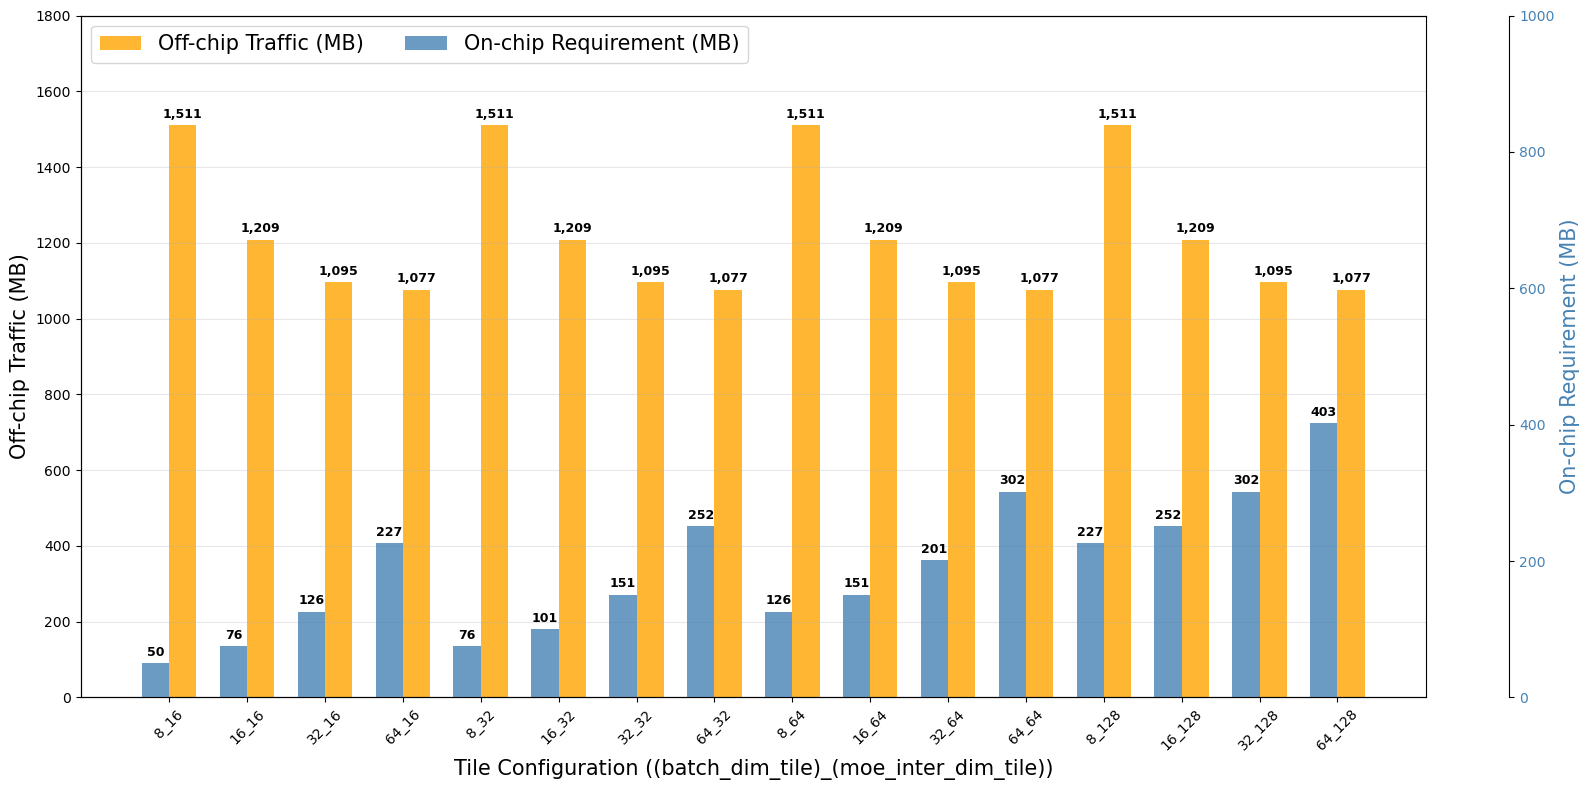

Data shape: (16, 9)
Columns: ['batch', 'tile_N', 'tile_F', 'flops', 'padded_flops', 'cycles', 'duration_s', 'off_chip_traffic_bytes', 'on_chip_requirement_bytes']
First few rows:
   batch  tile_N  tile_F        flops  padded_flops  cycles  duration_s  \
0     44       8      16  14093352960    6342008832       0           0   
1     44      16      16  22549364736   14798020608       0           0   
2     44      32      16  40870723584   33119379456       0           0   
3     44      64      16  80332111872   72580767744       0           0   
4     44       8      32  14093352960    6342008832       0           0   

   off_chip_traffic_bytes  on_chip_requirement_bytes  
0              1510671744                   50352130  
1              1208681856                   75517954  
2              1095435648                  125849602  
3              1076561280                  226512898  
4              1510671744                   75517954  


In [50]:
visualize_access_reuse_no_sim("./no_sim_qwen_2048_768_80gb_max4192_iter022_layer_010_mn_mk.csv")